*Downloading the dataset*

11490434/11490434 [==============================] - 0s 0us/step


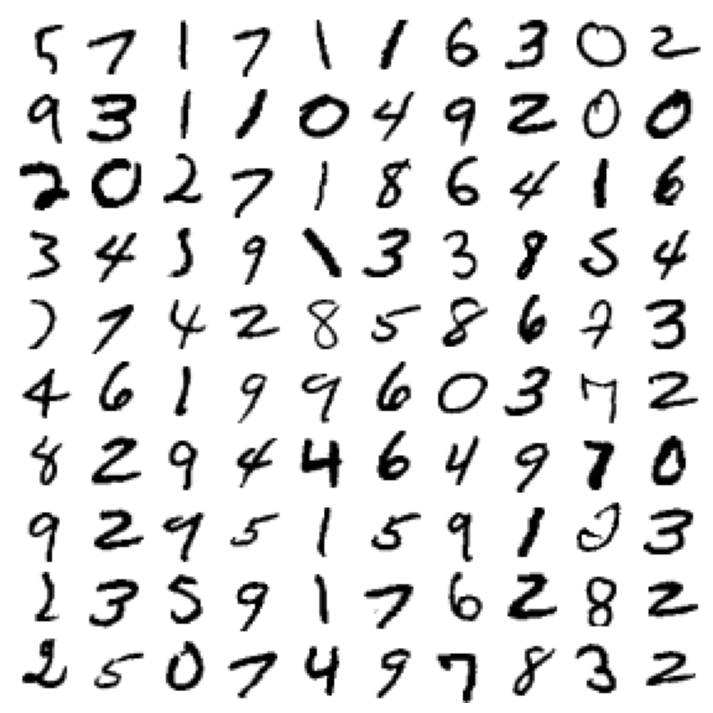

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Importing the dataset
from keras.datasets import mnist
from keras.utils import np_utils


(train_X, train_y), (test_X, test_y) = mnist.load_data()
# The training data will have 60000 samples, reshape for necessary array dimensions
train_X = train_X.reshape(train_X.shape[0], 1, 28*28)
train_X = train_X.astype('float32')
train_X /= 255
train_X, valid_X = train_X[:55000], train_X[55000:]
# Create desired out or one-hot-array. Range [0, 9] with vector size 10
train_y = np_utils.to_categorical(train_y)
train_y, valid_y = train_y[:55000], train_y[55000:]
# Test data contains 10000 samples
test_X = test_X.reshape(test_X.shape[0], 1, 28*28)
test_X = test_X.astype('float32')
test_X /= 255
test_y = np_utils.to_categorical(test_y)
#%%

def plot_digits(instances, images_per_row=10, **options):
  size = 28
  images_per_row = min(len(instances), images_per_row)
  images = [instance.reshape(size,size) for instance in instances]
  n_rows = (len(instances) - 1) // images_per_row + 1
  row_images = []
  n_empty = n_rows * images_per_row - len(instances)
  images.append(np.zeros((size, size * n_empty)))
  for row in range(n_rows):
    rimages = images[row * images_per_row : (row + 1) * images_per_row]
    row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
#%%
plt.figure(figsize=(9,9))
example_images = train_X[100:200]
plot_digits(example_images, images_per_row=10)
plt.show()

*Model creation - with less than 100K learnable params*

In [5]:
# Model creation
from keras import models, layers

model = models.Sequential([
    layers.Flatten(input_shape=(train_X.shape[1:])),
    layers.Dense(12, activation="relu"),
    layers.Dense(12, activation="relu"),
    layers.Dense(12, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 12)                9420      
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 12)                156       
                                                                 
 dense_7 (Dense)             (None, 10)                130       
                                                                 
Total params: 9,862
Trainable params: 9,862
Non-trainable params: 0
_________________________________________________________________


*Compiling and Training the Model*

In [ ]:
# Compiling and Training the Model
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["accuracy"])
history = model.fit(train_X, train_y, epochs=30, validation_data=(valid_X, valid_y))

*Plotting the accuracies*

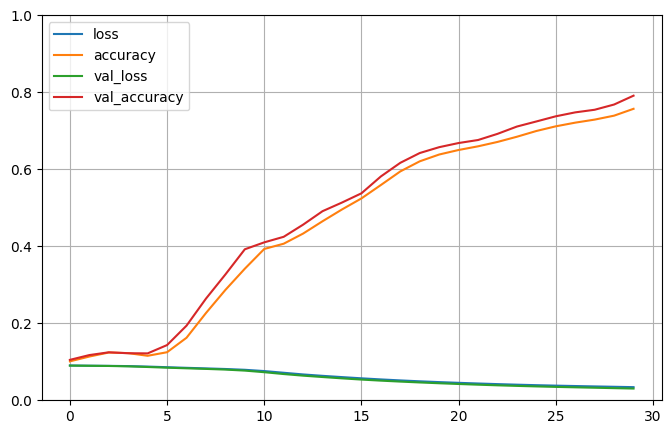

In [3]:
# Plotting the accuracies
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

*Evaluating the Unseen data*

In [4]:
# Evaluating the Unseen data
model.evaluate(test_X, test_y)

y_prob = model.predict(test_X)
y_prob = y_prob.round(2)

313/313 [==============================] - 0s 877us/step


*Saving the model*

In [ ]:
# Saving the model
model.save('./')